In [1]:
import pandas as pd

data = pd.read_csv('./winemag-data-130k-v2.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB
None


In [2]:
#print number of unique values in each column
print(data.nunique())

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64


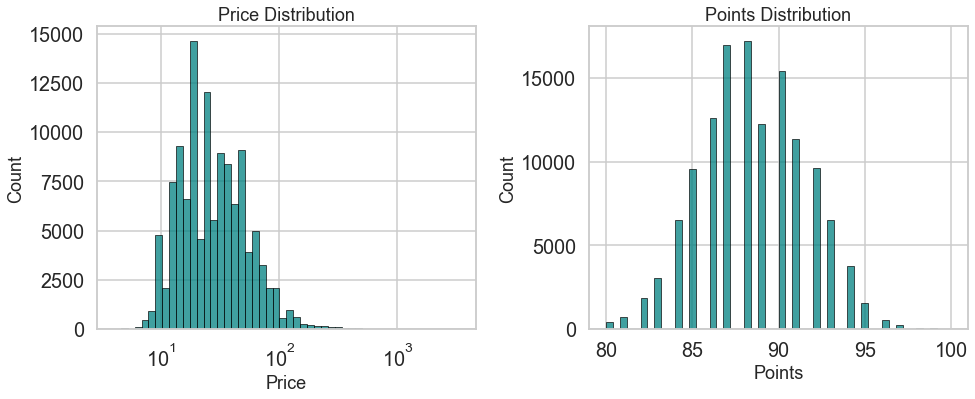

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for better aesthetics
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot the Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=50, log_scale=True, color='teal', edgecolor='black')
plt.title('Price Distribution', fontsize=18)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Plot the Points Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['points'], bins=50, color='teal', edgecolor='black')
plt.title('Points Distribution', fontsize=18)
plt.xlabel('Points', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('plots/price_points_distribution.pdf')
plt.show()

In [19]:
#Find sample covariance matrix
price_points_cov = data[['price', 'points']].corr()
print(price_points_cov)

           price    points
price   1.000000  0.416167
points  0.416167  1.000000


US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

/var/folders/0w/sghlgtdd1t76rmfjc1461x8w0000gn/T/ipykernel_77876/2411861932.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_combined.index, rotation=90, fontsize=10)


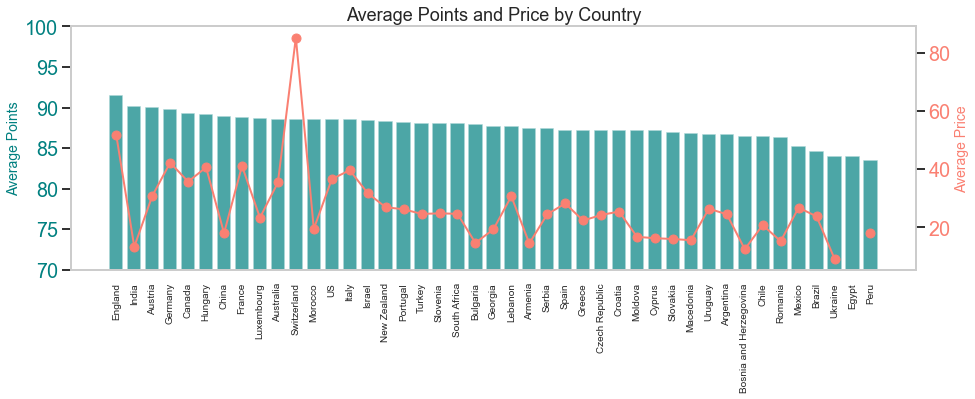

In [41]:
#Are certain countries producing better wines?
country_points = data.groupby('country')['points'].mean().sort_values(ascending=False)

#Are certain countries producing more expensive wines?
country_price = data.groupby('country')['price'].mean().sort_values(ascending=False)

#Print sample size per country
country_sample_size = data['country'].value_counts()
print(country_sample_size)

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is sorted consistently for both metrics
data_combined = (
    pd.DataFrame({'Average Points': country_points, 'Average Price': country_price})
    .sort_values('Average Points', ascending=False)
)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the bar graph for Average Points on the left y-axis
color1 = 'teal'
ax1.bar(data_combined.index, data_combined['Average Points'], color=color1, alpha=0.7, label='Average Points')
ax1.set_ylabel('Average Points', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(70, 100)  # Set the y-axis limit for Average Points
ax1.set_xticklabels(data_combined.index, rotation=90, fontsize=10)
ax1.grid(False)  # Disable the grid for the first y-axis

# Create a second y-axis for Average Price
ax2 = ax1.twinx()
color2 = 'salmon'
ax2.plot(data_combined.index, data_combined['Average Price'], color=color2, marker='o', label='Average Price', linewidth=2)
ax2.set_ylabel('Average Price', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)  # Disable the grid for the second y-axis
# Add a shared title
plt.title('Average Points and Price by Country', fontsize=18)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('plots/average_points_price_per_country.pdf')
plt.show()



Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64


/var/folders/0w/sghlgtdd1t76rmfjc1461x8w0000gn/T/ipykernel_77876/3470425205.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_combined.index, rotation=90, fontsize=10)


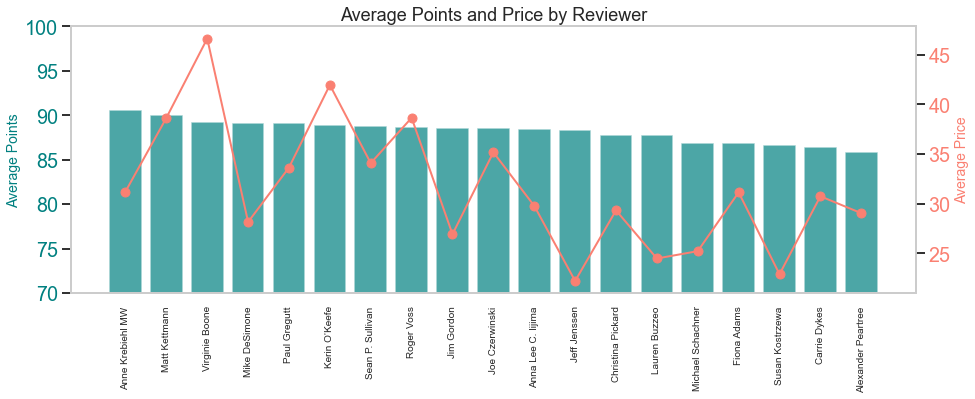

In [32]:
#Create the same thing but with reviewer names
country_points = data.groupby('taster_name')['points'].mean().sort_values(ascending=False)

#Are certain tasters tasting more expensive wines?
country_price = data.groupby('taster_name')['price'].mean().sort_values(ascending=False)
country_sample_size = data['taster_name'].value_counts()
print(country_sample_size)

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data is sorted consistently for both metrics
data_combined = (
    pd.DataFrame({'Average Points': country_points, 'Average Price': country_price})
    .sort_values('Average Points', ascending=False)
)

fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the bar graph for Average Points on the left y-axis
color1 = 'teal'
ax1.bar(data_combined.index, data_combined['Average Points'], color=color1, alpha=0.7, label='Average Points')
ax1.set_ylabel('Average Points', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(70, 100)  # Set the y-axis limit for Average Points
ax1.set_xticklabels(data_combined.index, rotation=90, fontsize=10)
ax1.grid(False)  # Disable the grid for the first y-axis

# Create a second y-axis for Average Price
ax2 = ax1.twinx()
color2 = 'salmon'
ax2.plot(data_combined.index, data_combined['Average Price'], color=color2, marker='o', label='Average Price', linewidth=2)
ax2.set_ylabel('Average Price', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(False)  # Disable the grid for the second y-axis
# Add a shared title
plt.title('Average Points and Price by Reviewer', fontsize=18)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('plots/average_points_price_per_reviewer.pdf')
plt.show()


0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object
Imported by Kobrand.
Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and complete version to date. Balancing cherry and plum fruit against the pretty barrel-infused tannins, it glides gracefully across the palate into a seamless finish.   Saggi is the Long Shadows collaboration with Tuscany's Ambrogio and Giovanni Folonari. the blend in 2007 is 43% Sangiovese, 36% Cabernet Sauvignon and 21% Syrah. With each new vintage, the percentage of Sangiovese climbs, putting more Tuscany in this new world super-Tuscan wine. Dark, dusty, strongly scented with barrel toast, coffee grounds and incense, this is the most substantial and compl

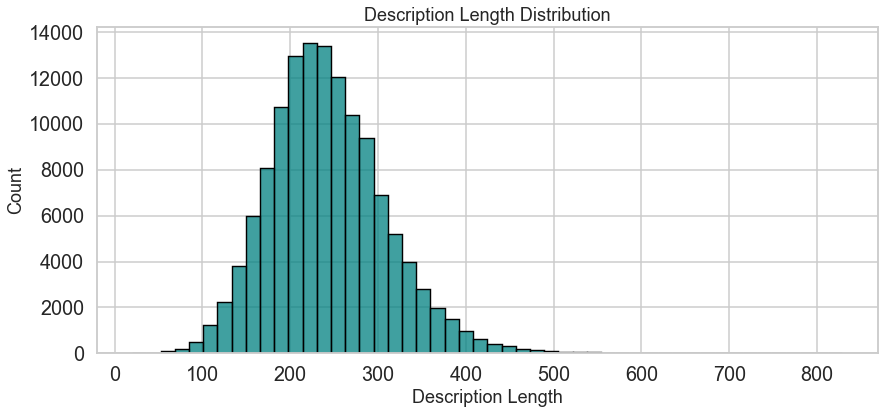

In [42]:
#Investigate the text data
print(data['description'].head())

#plot the length of the descriptions
data['description_length'] = data['description'].apply(len)

plt.figure(figsize=(14, 6))

# Plot the Distribution
sns.histplot(data['description_length'], bins=50, color='teal', edgecolor='black')
plt.title('Description Length Distribution', fontsize=18)
plt.xlabel('Description Length', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.savefig('plots/description_length_distribution.pdf')

#print out the shortest review
print(data.loc[data['description_length'].idxmin(), 'description'])
print(data.loc[data['description_length'].idxmax(), 'description'])
print(data.loc[data['description_length'].idxmax(), 'taster_name'])

# Count the total number of unique words in the dataset
unique_words = set()
data['description'].str.split().apply(unique_words.update)
print('Total number of unique words:', len(unique_words))